In [64]:
# Airline Passenger Satisfaction Analysis
# Business Analytics Portfolio Project
# Author: Carolina Galindo Mendoza
# Date: 09/18/2025.

# Original file is located at
   # https://colab.research.google.com/drive/1Z2jNjWnc54St9x-OMGXTbTdPo2zf71fR?usp=sharing

## Airline Passenger Satisfaction Analysis - Data Exploration

### Project Overview
This analysis examines factors influencing airline passenger satisfaction using a dataset of 120,000+ passenger surveys.

### Business Problem
Airlines need to understand what drives passenger satisfaction to improve service quality, increase loyalty, and reduce churn.

### Key Questions:
1. What factors are most strongly correlated with passenger satisfaction?
2. How does satisfaction differ across customer segments?
3. Can we predict passenger satisfaction from service metrics?
4. What actionable recommendations can we provide to airline management?

In [65]:
## Import Libraries
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set visual style
plt.style.use('default')
sns.set_palette("viridis")
%matplotlib inline

## Load and Explore Data

In [66]:
# Mount Google Drive

In [67]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
path = '/content/drive/MyDrive/train.csv'
df = pd.read_csv(path)

In [69]:
# Display basic information
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (103904, 25)

First 5 rows:


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [70]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location           

In [71]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310

In [72]:
print("\nDescriptive Statistics:")
df.describe()


Descriptive Statistics:


,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


## Data Cleaning and Modification

In [73]:
# Check for missing values
print("Missing Values Before Handling:")
print(df.isnull().sum())

Missing Values Before Handling:
Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes 

In [74]:
# Handle missing values in Arrival Delay (fill with median)
arrival_delay_median = df['Arrival Delay in Minutes'].median()
df['Arrival Delay in Minutes'].fillna(arrival_delay_median, inplace=True)

/tmp/ipython-input-1172709620.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Arrival Delay in Minutes'].fillna(arrival_delay_median, inplace=True)


In [75]:
print("\nMissing Values After Handling:")
print(df.isnull().sum())


Missing Values After Handling:
Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                    

In [87]:
# Check for Variable types that need to be changed
df.dtypes

,0
Unnamed: 0,int64
id,int64
Gender,category
Customer Type,category
Age,int64
Type of Travel,category
Class,category
Flight Distance,int64
Inflight wifi service,int64
Departure/Arrival time convenient,int64


In [88]:
# Change object variable types to category
df['Gender'] = df['Gender'].astype('category')
df['Customer Type'] = df['Customer Type'].astype('category')
df['Type of Travel'] = df['Type of Travel'].astype('category')
df['Class'] = df['Class'].astype('category')
df['satisfaction'] = df['satisfaction'].astype('category')

print("\nUpdated Data Types:")
print(df.dtypes)


Updated Data Types:
Unnamed: 0                              int64
id                                      int64
Gender                               category
Customer Type                        category
Age                                     int64
Type of Travel                       category
Class                                category
Flight Distance                         int64
Inflight wifi service                   int64
Departure/Arrival time convenient       int64
Ease of Online booking                  int64
Gate location                           int64
Food and drink                          int64
Online boarding                         int64
Seat comfort                            int64
Inflight entertainment                  int64
On-board service                        int64
Leg room service                        int64
Baggage handling                        int64
Checkin service                         int64
Inflight service                        int64
Cleanliness  

In [78]:
df.describe(include='category')

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


In [79]:
# Create binary satisfaction target
df['satisfied'] = df['satisfaction'].apply(
    lambda x: 1 if x == 'satisfied' else 0
)

In [80]:
# Drop unnecessary columns
df_clean = df.drop(['Unnamed: 0', 'id'], axis=1, errors='ignore')

In [81]:
print("Cleaned Dataset Shape:", df_clean.shape)

Cleaned Dataset Shape: (103904, 24)


## Basic Visualizations

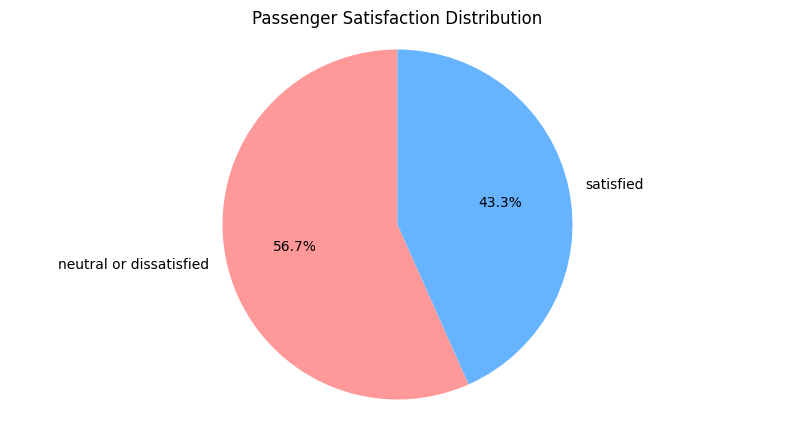

In [82]:
# Satisfaction distribution
plt.figure(figsize=(10, 5))
satisfaction_counts = df_clean['satisfaction'].value_counts()
plt.pie(satisfaction_counts, labels=satisfaction_counts.index,
        autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Passenger Satisfaction Distribution')
plt.axis('equal')
plt.show()

Text(0.5, 1.0, 'Customer Type Distribution')

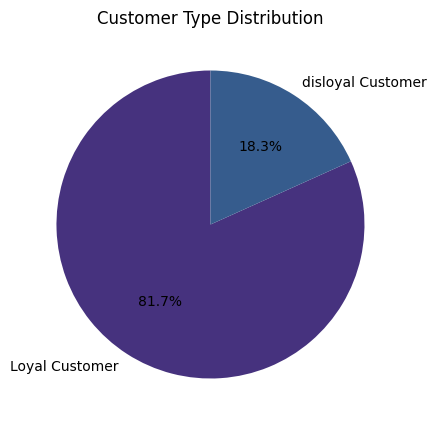

In [83]:
# Customer type distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
customer_type_counts = df_clean['Customer Type'].value_counts()
plt.pie(customer_type_counts, labels=customer_type_counts.index,
        autopct='%1.1f%%', startangle=90)
plt.title('Customer Type Distribution')

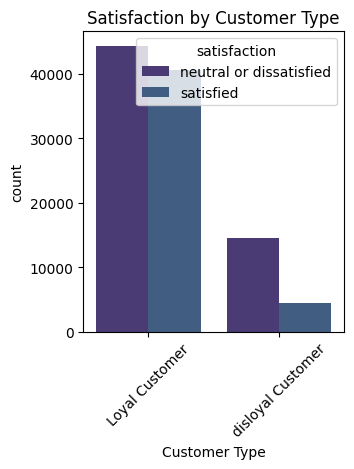

In [84]:
plt.subplot(1, 2, 2)
sns.countplot(x='Customer Type', hue='satisfaction', data=df_clean)
plt.title('Satisfaction by Customer Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

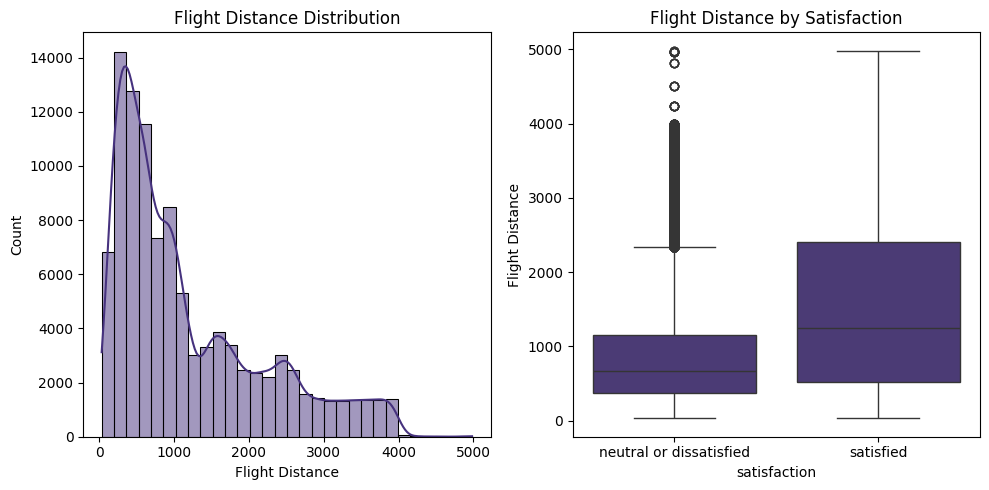

In [85]:
# Flight distance distribution
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_clean['Flight Distance'], bins=30, kde=True)
plt.title('Flight Distance Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(x='satisfaction', y='Flight Distance', data=df_clean)
plt.title('Flight Distance by Satisfaction')
plt.tight_layout()
plt.show()

In [86]:
# Save cleaned dataset for next notebooks
df_clean.to_csv('/content/cleaned_airline_data.csv', index=False)
print("Cleaned dataset saved for next analysis steps.")

Cleaned dataset saved for next analysis steps.
